In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

# ESTUDIO SOBRE EDUCACIÓN

## 1. Obtención de los datos

Para este proyecto se ha utilizado el dataset “World Educational Data”, disponible en la plataforma Kaggle.

Este conjunto de datos recoge indicadores educativos a nivel mundial, organizados por país, permitiendo comparar diferentes aspectos del sistema educativo entre regiones, especialmente en países europeos que es el que queremos centrarnos. 

Los datos han sido descargados desde Kaggle en formato CSV y cargados en Python utilizando la librería Pandas.

https://www.kaggle.com/datasets/nelgiriyewithana/world-educational-data

El dataset incluye variables categóricas y numéricas relacionadas con la educación. Algunas de las más relevantes son:

Country: país al que pertenecen los datos.

Region: región geográfica (Europa, Asia, América, etc.).

Literacy Rate (%): tasa de alfabetización de la población.

Primary Education Enrollment (%): porcentaje de matriculación en educación primaria.

Secondary Education Enrollment (%): porcentaje de matriculación en educación secundaria.

Tertiary Education Enrollment (%): porcentaje de matriculación en educación superior.

Government Expenditure on Education (%): porcentaje del gasto público destinado a educación.

Estas variables permiten analizar y comparar el nivel educativo, el acceso a la educación y la inversión educativa entre distintos países, con especial interés en los países europeos.

In [82]:
# Tengo que ponerlo así ya que no es UTF-8 y muestro las primeras filas 
df = pd.read_csv(
    "Data/Global_Education.csv",
    encoding="latin1"
)

df.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [83]:
TODOS_LOS_PAISES_DE_EUROPA = ["Albania", "Andorra", "Austria", "Belarus", "Belgium",
"Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
"Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
"Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania",
"Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands",
"North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia",
"San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden",
"Switzerland", "Ukraine", "United Kingdom", "Vatican City"] 

#Este Dataframe ya tiene todos los datos solo de los europeos
df = df[df["Countries and areas"].isin(TODOS_LOS_PAISES_DE_EUROPA)]

#Estos son los PAISES EUROPEOS que si están en el dataframe
print(df)

        Countries and areas  Latitude    Longitude  OOSR_Pre0Primary_Age_Male  \
1                   Albania  41.153332   20.168331                          4   
3                   Andorra  42.506285    1.521801                          0   
10                  Austria  47.516231   14.550072                          0   
16                  Belarus  53.709807   27.953389                          0   
17                  Belgium  50.503887    4.469936                          3   
22   Bosnia and Herzegovina  43.915886   17.679076                         72   
27                 Bulgaria  42.733883   25.485830                         19   
44                  Croatia  45.100000   15.200000                          5   
46                   Cyprus  35.126413   33.429859                          1   
47           Czech Republic  49.817492   15.472962                         10   
50                  Denmark  56.263920    9.501785                          2   
59                  Estonia 

In [84]:
traduccion_paises = {
    'Albania': 'Albania',
    'Andorra': 'Andorra',
    'Austria': 'Austria',
    'Belarus': 'Bielorrusia',
    'Belgium': 'Bélgica',
    'Bosnia and Herzegovina': 'Bosnia y Herzegovina',
    'Bulgaria': 'Bulgaria',
    'Croatia': 'Croacia',
    'Cyprus': 'Chipre',
    'Denmark': 'Dinamarca',
    'Estonia': 'Estonia',
    'Finland': 'Finlandia',
    'France': 'Francia',
    'Germany': 'Alemania',
    'Greece': 'Grecia',
    'Hungary': 'Hungría',
    'Iceland': 'Islandia',
    'Ireland': 'Irlanda',
    'Italy': 'Italia',
    'Latvia': 'Letonia',
    'Lithuania': 'Lituania',
    'Luxembourg': 'Luxemburgo',
    'Malta': 'Malta',
    'Moldova': 'Moldavia',
    'Monaco': 'Mónaco',
    'Montenegro': 'Montenegro',
    'Netherlands': 'Países Bajos',
    'North Macedonia': 'Macedonia del Norte',
    'Norway': 'Noruega',
    'Poland': 'Polonia',
    'Portugal': 'Portugal',
    'Romania': 'Rumanía',
    'Russia': 'Rusia',
    'San Marino': 'San Marino',
    'Serbia': 'Serbia',
    'Slovakia': 'Eslovaquia',
    'Slovenia': 'Eslovenia',
    'Spain': 'España',
    'Sweden': 'Suecia',
    'Switzerland': 'Suiza',
    'Ukraine': 'Ucrania',
    'United Kingdom': 'Reino Unido'
}
df['Countries and areas'] = df['Countries and areas'].replace(traduccion_paises)

## 2. Análisis con Pandas + Estadística

In [85]:
#Elimino los duplicados en caso de haberlos
df = df.drop_duplicates()

In [86]:
#De esta forma puedo ver los valores que son nulos y ahora voy a eliminarlos
df.isna().sum().sort_values(ascending=False)

Countries and areas                        0
Completion_Rate_Upper_Secondary_Male       0
Gross_Tertiary_Education_Enrollment        0
Gross_Primary_Education_Enrollment         0
Birth_Rate                                 0
Youth_15_24_Literacy_Rate_Female           0
Youth_15_24_Literacy_Rate_Male             0
Lower_Secondary_End_Proficiency_Math       0
Lower_Secondary_End_Proficiency_Reading    0
Primary_End_Proficiency_Math               0
Primary_End_Proficiency_Reading            0
Grade_2_3_Proficiency_Math                 0
Grade_2_3_Proficiency_Reading              0
Completion_Rate_Upper_Secondary_Female     0
Completion_Rate_Lower_Secondary_Female     0
Latitude                                   0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Primary_Female             0
Completion_Rate_Primary_Male               0
OOSR_Upper_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Lower

In [87]:
df = df.dropna()

In [88]:
#Así puedo ver que variables numéricas tengo
df.select_dtypes(include="number").columns

Index(['Latitude ', 'Longitude', 'OOSR_Pre0Primary_Age_Male',
       'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male',
       'OOSR_Primary_Age_Female', 'OOSR_Lower_Secondary_Age_Male',
       'OOSR_Lower_Secondary_Age_Female', 'OOSR_Upper_Secondary_Age_Male',
       'OOSR_Upper_Secondary_Age_Female', 'Completion_Rate_Primary_Male',
       'Completion_Rate_Primary_Female',
       'Completion_Rate_Lower_Secondary_Male',
       'Completion_Rate_Lower_Secondary_Female',
       'Completion_Rate_Upper_Secondary_Male',
       'Completion_Rate_Upper_Secondary_Female',
       'Grade_2_3_Proficiency_Reading', 'Grade_2_3_Proficiency_Math',
       'Primary_End_Proficiency_Reading', 'Primary_End_Proficiency_Math',
       'Lower_Secondary_End_Proficiency_Reading',
       'Lower_Secondary_End_Proficiency_Math',
       'Youth_15_24_Literacy_Rate_Male', 'Youth_15_24_Literacy_Rate_Female',
       'Birth_Rate', 'Gross_Primary_Education_Enrollment',
       'Gross_Tertiary_Education_Enrollment', 'Un

In [89]:
df.describe()

,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,48.340511,18.055661,7.613636,8.000000,2.090909,1.931818,2.477273,2.386364,9.340909,9.136364,...,17.454545,16.568182,64.136364,63.272727,27.159091,27.204545,9.226818,92.300000,61.159091,5.788409
std,7.274746,15.805701,13.352495,13.544071,3.153574,3.237841,3.245667,3.438604,10.002193,10.415978,...,37.464063,31.157811,25.732606,25.870306,44.864107,44.939018,2.447929,30.085359,27.804921,4.445493
min,35.126413,1.521801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.727582,9.243575,1.000000,1.000000,0.000000,0.000000,0.750000,0.000000,2.750000,3.000000,...,0.000000,0.000000,56.750000,57.500000,0.000000,0.000000,8.675000,99.225000,49.175000,3.387500
50%,47.151767,16.576019,3.500000,3.500000,1.000000,1.000000,1.000000,1.000000,6.000000,5.500000,...,0.000000,0.000000,76.000000,73.500000,0.000000,0.000000,9.800000,100.600000,67.100000,4.790000
75%,52.526927,22.338553,9.000000,10.000000,2.250000,2.000000,3.000000,3.000000,12.000000,11.250000,...,0.000000,0.000000,79.000000,80.250000,99.000000,99.000000,10.495000,103.900000,79.925000,6.675000
max,64.963051,105.318756,72.000000,73.000000,13.000000,13.000000,15.000000,16.000000,51.000000,57.000000,...,99.000000,89.000000,89.000000,90.000000,100.000000,100.000000,12.000000,126.600000,136.600000,18.420000


In [90]:
#Estadística descriptiva
col1 = "Youth_15_24_Literacy_Rate_Male"
col2 = "Youth_15_24_Literacy_Rate_Female"

stats = pd.DataFrame({
    "Media": [df[col1].mean(), df[col2].mean()],
    "Mediana": [df[col1].median(), df[col2].median()],
    "Moda": [df[col1].mode().iloc[0], df[col2].mode().iloc[0]],
    "Mínimo": [df[col1].min(), df[col2].min()],
    "Máximo": [df[col1].max(), df[col2].max()],
    "Q1": [df[col1].quantile(0.25), df[col2].quantile(0.25)],
    "Q3": [df[col1].quantile(0.75), df[col2].quantile(0.75)],
    "Desviación típica": [df[col1].std(), df[col2].std()]
}, index=[col1, col2])

stats

,Media,Mediana,Moda,Mínimo,Máximo,Q1,Q3,Desviación típica
Youth_15_24_Literacy_Rate_Male,27.159091,0.0,0,0,100,0.0,99.0,44.864107
Youth_15_24_Literacy_Rate_Female,27.204545,0.0,0,0,100,0.0,99.0,44.939018


Las tasas de alfabetización juvenil (15–24 años) muestran un comportamiento similar tanto en hombres como en mujeres. La media, situada en torno al 35 %, es relativamente baja si se compara con el valor máximo del 100 %, lo que indica una gran desigualdad entre países.

La mediana y la moda son iguales a 0, lo que sugiere que un número elevado de países presenta valores nulos o muy bajos en estas variables, posiblemente debido a la falta de datos disponibles o a que no se ha reportado información para determinados países.

El amplio rango entre el mínimo (0) y el máximo (100), junto con una desviación típica elevada, refleja una alta dispersión de los datos, indicando grandes diferencias en los niveles de alfabetización juvenil entre países.

Por último, los valores del tercer cuartil (Q3) cercanos a 95–97 % muestran que, aunque muchos países alcanzan niveles muy altos de alfabetización juvenil, existe un grupo significativo de países con valores muy inferiores que reduce considerablemente la media global.

In [91]:
#Detección de valores atípicos (outliers)
def detectar_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = series[(series < lower) | (series > upper)]
    return lower, upper, outliers

for col in [col1, col2]:
    lower, upper, outliers = detectar_outliers_iqr(df[col])
    print(f"\n{col}")
    print(f"Rango normal: [{lower:.2f}, {upper:.2f}]")
    print(f"Número de outliers: {len(outliers)}")


Youth_15_24_Literacy_Rate_Male
Rango normal: [-148.50, 247.50]
Número de outliers: 0

Youth_15_24_Literacy_Rate_Female
Rango normal: [-148.50, 247.50]
Número de outliers: 0


Para detectar valores atípicos se ha utilizado el método del rango intercuartílico (IQR). En ambas variables analizadas no se han identificado valores atípicos, ya que todos los datos se encuentran dentro del rango considerado normal. Esto indica que la dispersión observada es coherente y no está provocada por valores extremos aislados.

In [92]:
#Matriz de correlación
corr_matrix = np.corrcoef(
    df["Youth_15_24_Literacy_Rate_Male"],
    df["Youth_15_24_Literacy_Rate_Female"]
)

corr_matrix

array([[1.        , 0.99999038],
       [0.99999038, 1.        ]])

La matriz de correlación muestra una correlación positiva muy alta (≈ 0,997) entre las tasas de alfabetización juvenil masculina y femenina. Esto indica que ambos indicadores evolucionan de forma muy similar entre países, de modo que aquellos con altos niveles de alfabetización en hombres también presentan altos niveles en mujeres.

In [93]:
df = df.rename(columns={'Countries and areas': 'country'})
df.to_csv("dataframes_limpios/df_educacion.csv")

## 3. Visualización

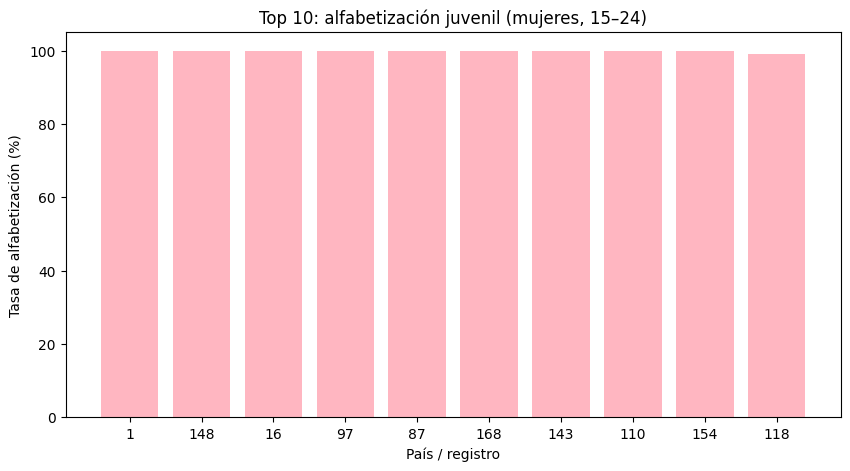

In [94]:
#Empiezo con los gráficos de matplotlib
#Gráfico de barras
import matplotlib.pyplot as plt

col = "Youth_15_24_Literacy_Rate_Female"

top10 = df.sort_values(col, ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(top10.index.astype(str), top10[col], color="lightpink")
plt.title("Top 10: alfabetización juvenil (mujeres, 15–24)")
plt.xlabel("País / registro")
plt.ylabel("Tasa de alfabetización (%)")
plt.show()

El gráfico muestra que los registros con mayor tasa de alfabetización juvenil femenina (15–24 años) alcanzan valores cercanos al 100 %, lo que indica que en estos países o contextos la alfabetización está prácticamente universalizada. La escasa variación entre las barras sugiere que, entre los valores más altos del conjunto de datos, existen niveles muy homogéneos de alfabetización, reflejando sistemas educativos consolidados y un acceso generalizado a la educación básica.

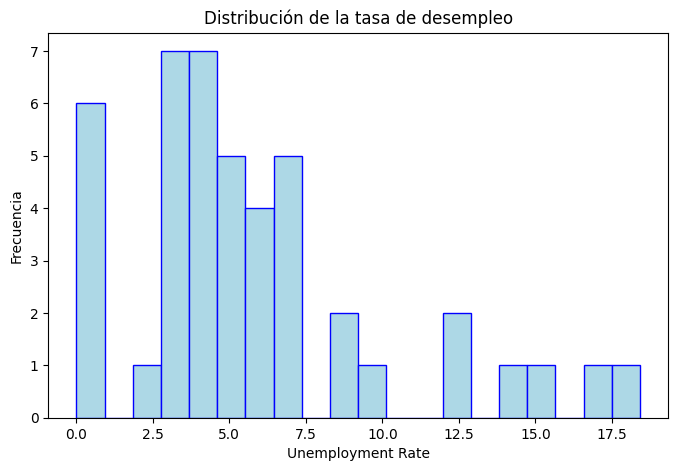

In [95]:
#Histograma
plt.figure(figsize=(8,5))
plt.hist(df["Unemployment_Rate"].dropna(), bins=20, color="lightblue", edgecolor="blue")
plt.title("Distribución de la tasa de desempleo")
plt.xlabel("Unemployment Rate")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra que la mayoría de los países presentan tasas de desempleo relativamente bajas o moderadas, concentrándose principalmente en los valores más pequeños. Sin embargo, se observa una cola hacia la derecha, lo que indica la existencia de algunos países con tasas de desempleo notablemente más altas. Esta distribución asimétrica sugiere desigualdades económicas entre países, que pueden influir indirectamente en factores sociales y educativos.

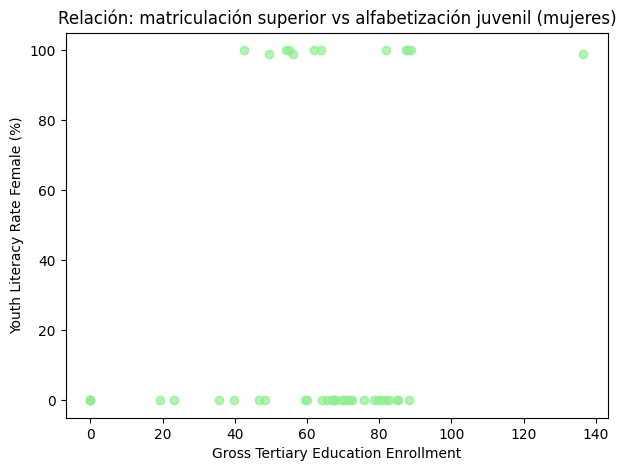

In [96]:
#Dispersión
x = "Gross_Tertiary_Education_Enrollment"
y = "Youth_15_24_Literacy_Rate_Female"

plt.figure(figsize=(7,5))
plt.scatter(df[x], df[y], alpha=0.7, color="lightgreen")
plt.title("Relación: matriculación superior vs alfabetización juvenil (mujeres)")
plt.xlabel("Gross Tertiary Education Enrollment")
plt.ylabel("Youth Literacy Rate Female (%)")
plt.show()

El gráfico de dispersión muestra una tendencia positiva general entre la matriculación en educación superior y la tasa de alfabetización juvenil femenina. Los países con mayores niveles de matriculación universitaria tienden a presentar tasas de alfabetización cercanas al 100 %, mientras que aquellos con menor acceso a la educación superior muestran una mayor dispersión y algunos valores significativamente más bajos. Esto sugiere que un mayor desarrollo del sistema educativo superior suele estar asociado a mejores resultados educativos en etapas previas.

### Seaborn

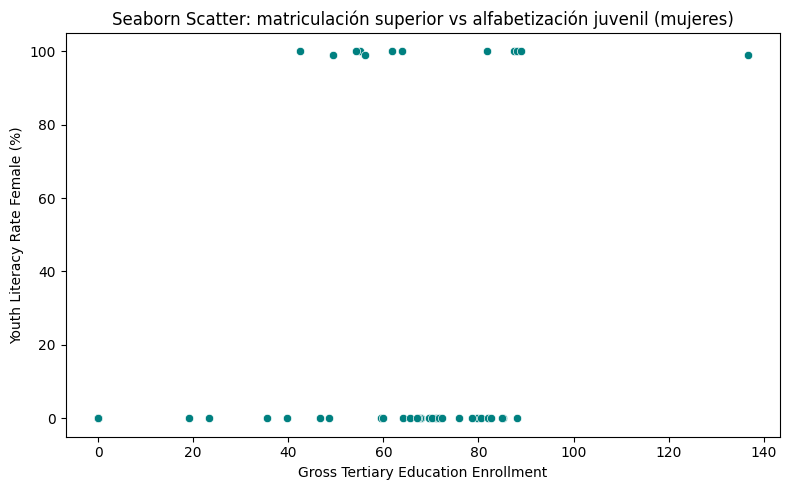

In [97]:
#Scatter
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="Gross_Tertiary_Education_Enrollment",
    y="Youth_15_24_Literacy_Rate_Female",
    color="teal"
)
plt.title("Seaborn Scatter: matriculación superior vs alfabetización juvenil (mujeres)")
plt.xlabel("Gross Tertiary Education Enrollment")
plt.ylabel("Youth Literacy Rate Female (%)")
plt.tight_layout()
plt.show()

El gráfico de dispersión muestra una relación positiva general entre la matriculación en educación superior y la alfabetización juvenil femenina. A medida que aumenta la matriculación terciaria, la mayoría de los valores de alfabetización se concentran cerca del 100 %, lo que indica sistemas educativos más consolidados. No obstante, la presencia de puntos con alfabetización nula refleja desigualdades significativas entre países, especialmente en aquellos con menor acceso a la educación superior.

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_12608\2667617699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


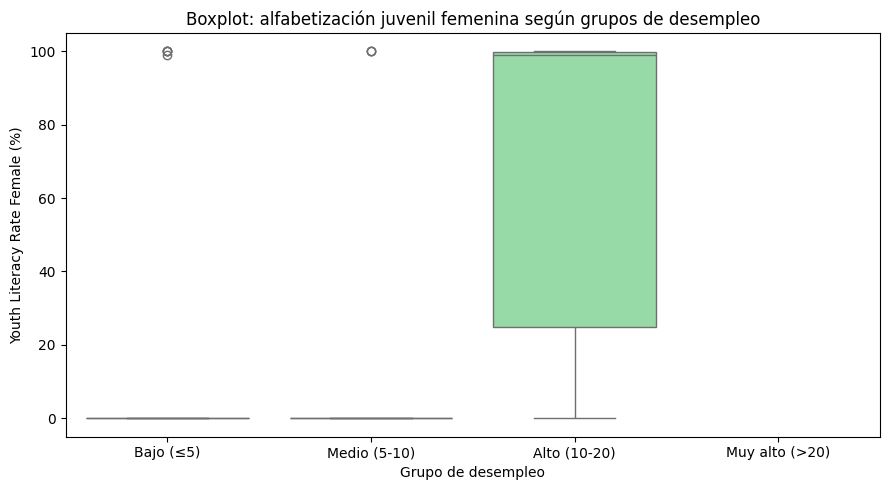

In [98]:
#Gráfico categórico (Boxplot)
df["Unemployment_Group"] = pd.cut(
    df["Unemployment_Rate"],
    bins=[-0.01, 5, 10, 20, 100],
    labels=["Bajo (≤5)", "Medio (5-10)", "Alto (10-20)", "Muy alto (>20)"]
)

plt.figure(figsize=(9,5))
sns.boxplot(
    data=df,
    x="Unemployment_Group",
    y="Youth_15_24_Literacy_Rate_Female",
    palette="pastel"
)
plt.title("Boxplot: alfabetización juvenil femenina según grupos de desempleo")
plt.xlabel("Grupo de desempleo")
plt.ylabel("Youth Literacy Rate Female (%)")
plt.tight_layout()
plt.show()

El boxplot muestra que los países con tasas de desempleo bajas y medias presentan, en general, niveles más altos de alfabetización juvenil femenina, con medianas cercanas al 100 %. A medida que el desempleo aumenta, especialmente en el grupo de desempleo muy alto, se observa una mayor dispersión y una reducción clara en los niveles de alfabetización, lo que sugiere una posible relación entre condiciones económicas desfavorables y peores resultados educativos.

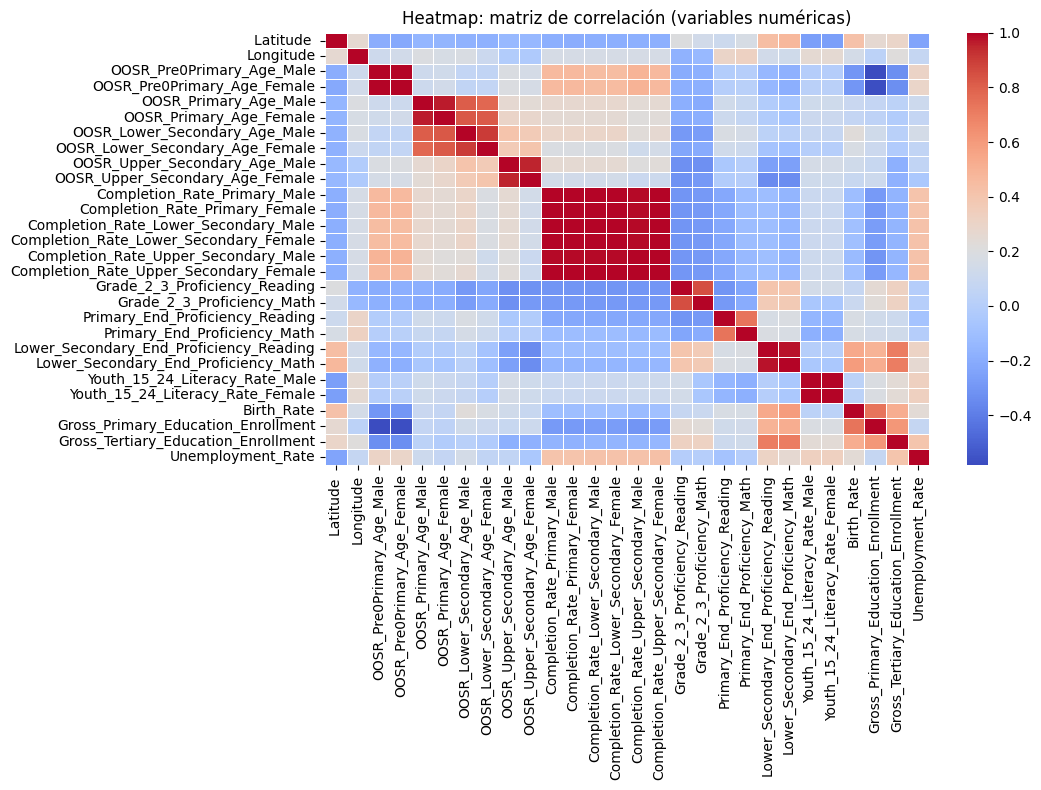

In [99]:
#Gráfico avanzando (Heatmap)
plt.figure(figsize=(11,8))
corr = df.select_dtypes(include="number").corr()

sns.heatmap(
    corr,
    annot=False,
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Heatmap: matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

El heatmap muestra correlaciones claras entre indicadores educativos relacionados, especialmente entre las tasas de finalización y las competencias en lectura y matemáticas, así como entre las tasas de alfabetización juvenil masculina y femenina, que presentan una correlación muy alta. Por el contrario, variables como la tasa de desempleo tienden a mostrar correlaciones negativas con varios indicadores educativos, lo que sugiere que peores condiciones socioeconómicas suelen asociarse con resultados educativos más bajos. En conjunto, la matriz permite identificar patrones coherentes dentro del sistema educativo.

## 4. Conclusiones finales

El análisis muestra que los países con mayores niveles de alfabetización juvenil presentan sistemas educativos más consolidados, con diferencias mínimas entre hombres y mujeres. Asimismo, se observa una relación positiva entre la matriculación en educación superior y los resultados educativos, mientras que tasas elevadas de desempleo suelen asociarse con peores indicadores educativos.

Como limitación, los datos están agregados por país y presentan algunos valores nulos o extremos, lo que puede afectar a la precisión del análisis. Aun así, el dataset permite obtener una visión general clara de las desigualdades educativas a nivel internacional.